# Navie-Bayes

This notebook will apply the Naive Bayes algorithm to a previously preprocessed dataset. Context: we are ttrying to predict wether a person has diabetes or not based on some features we have in the dataset obtained from Kaggle.


In [1]:
# All the imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Train on data. No parameters to adjust
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import (
    StratifiedKFold, 
    cross_val_score, 
    train_test_split
)
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,\
                 f1_score

In [2]:
# Load the dataset
try:
    diabetes_df = pd.read_csv('../preprocessing_scripts/Data_preprocessed_10000.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    diabetes_df = None
    print("File not found. Please check the file path.")

Dataset loaded successfully.


In [3]:
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,1.0,-1.071593,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,4.0,5.0
1,0.0,0.0,0.0,1.0,0.628607,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,3.0,1.0,0.0,13.0,5.0,4.0
2,0.0,1.0,1.0,1.0,-0.319133,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,5.0,0.0,1.0,8.0,6.0,6.0
3,0.0,0.0,1.0,1.0,0.017644,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,7.0,5.0,8.0
4,1.0,1.0,0.0,1.0,2.311887,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,10.0,1.0,1.0,6.0,6.0,3.0


In [4]:
print("Shape of the dataset:", diabetes_df.shape)
print("Type of columns in the dataset:")
print(diabetes_df.dtypes)

Shape of the dataset: (9939, 22)
Type of columns in the dataset:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


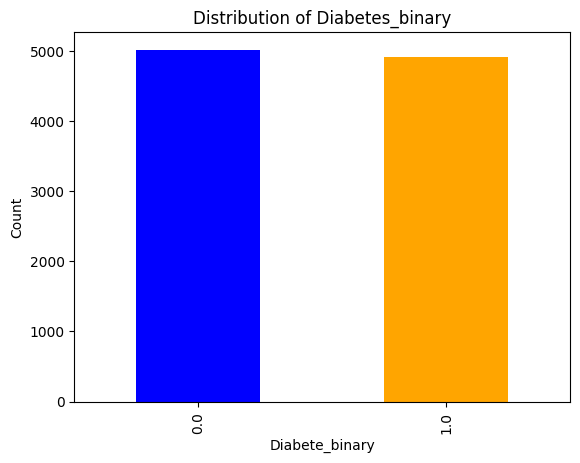

In [5]:
diabetes_df['Diabetes_binary'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabete_binary')
plt.ylabel('Count')
plt.show()

In [6]:
print("Proportion of each class in the target variable:")
proportion_of_classes = diabetes_df['Diabetes_binary'].value_counts(normalize=True)
print(proportion_of_classes)

Proportion of each class in the target variable:
Diabetes_binary
0.0    0.505081
1.0    0.494919
Name: proportion, dtype: float64


In [7]:
X = diabetes_df.drop(columns=['Diabetes_binary'])
y = diabetes_df['Diabetes_binary']

In [8]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (9939, 21)
Shape of y: (9939,)


Text(0.5, 1.0, 'Correlation Between Features')

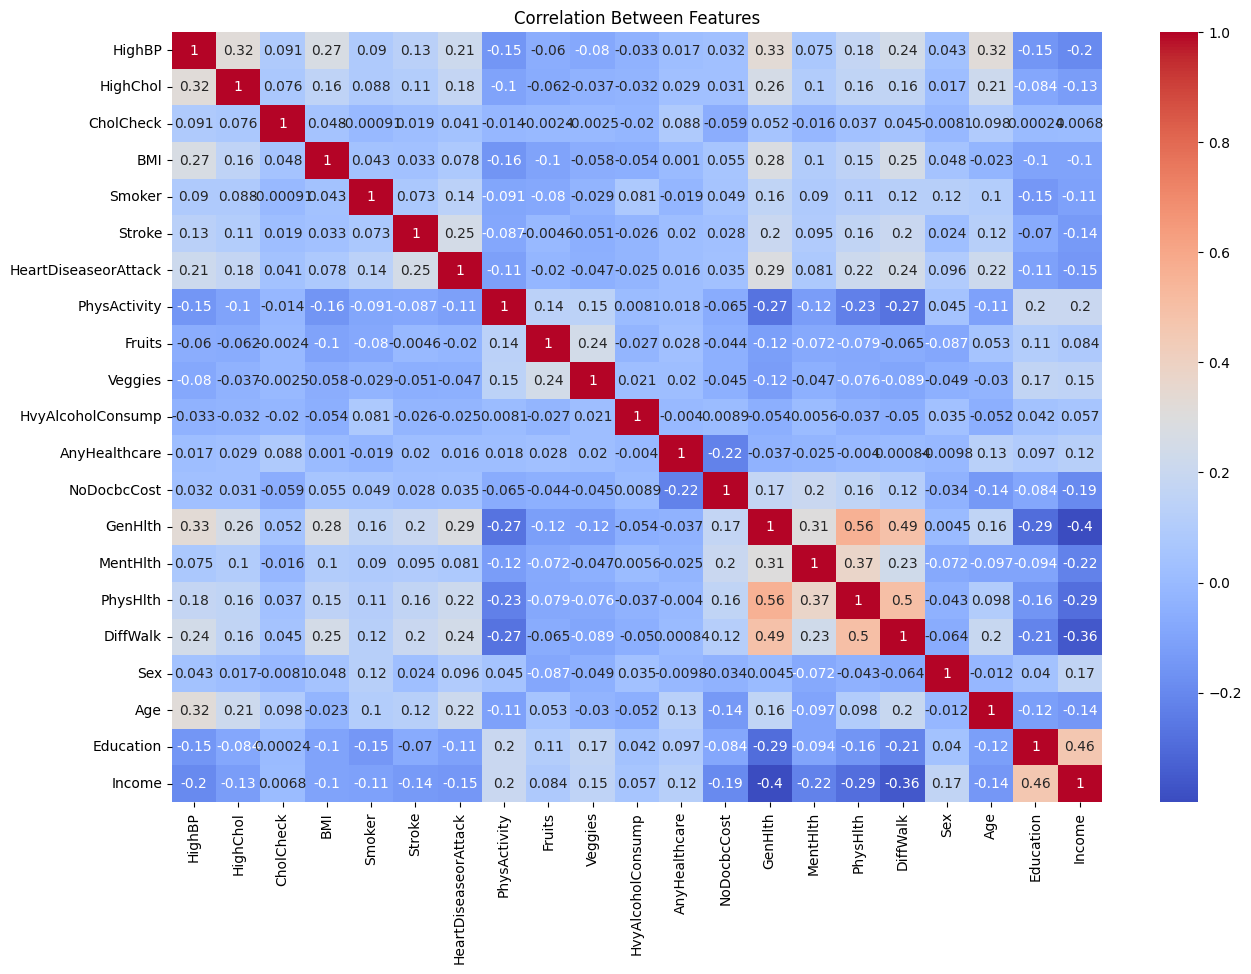

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')

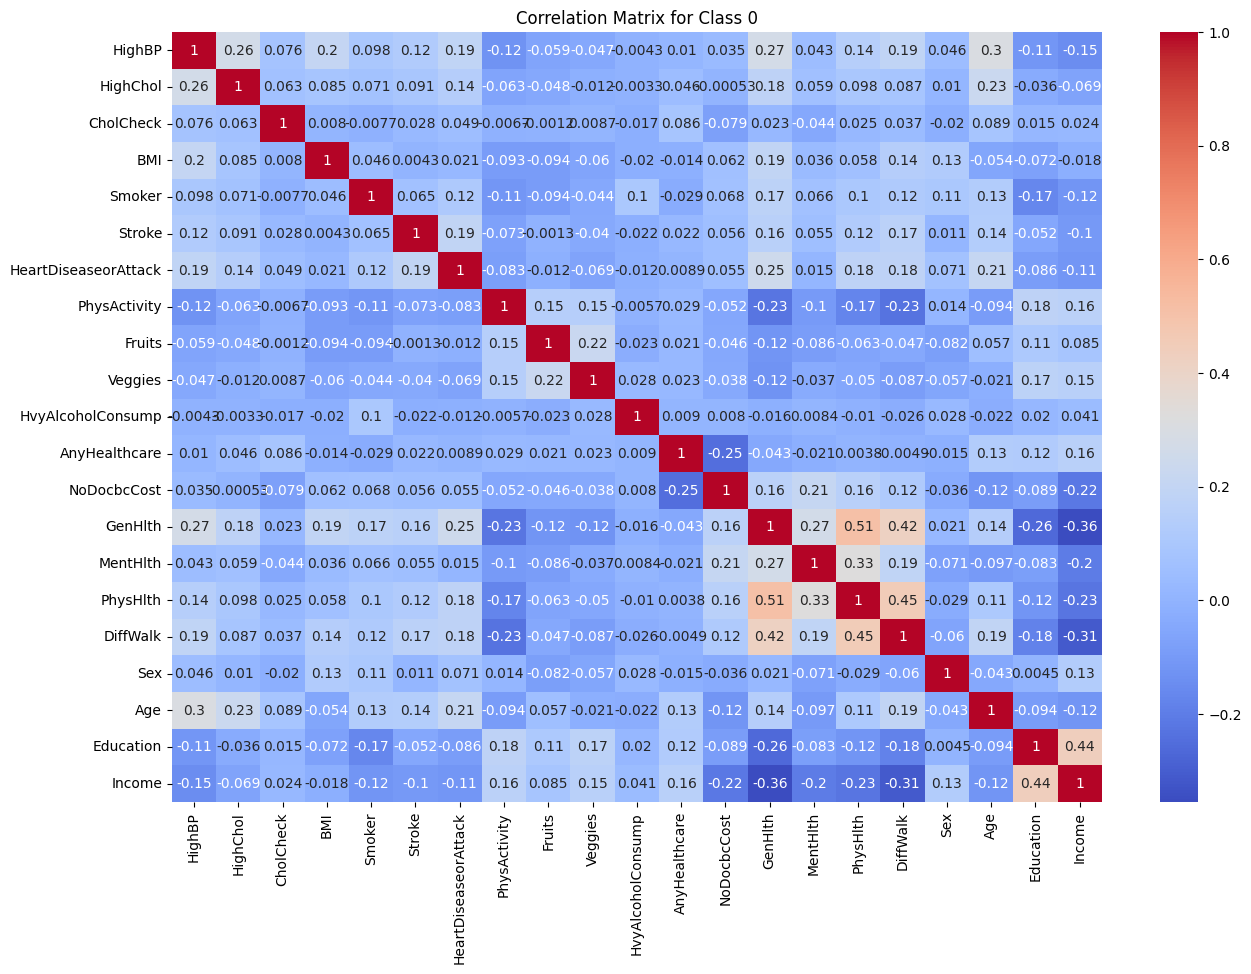

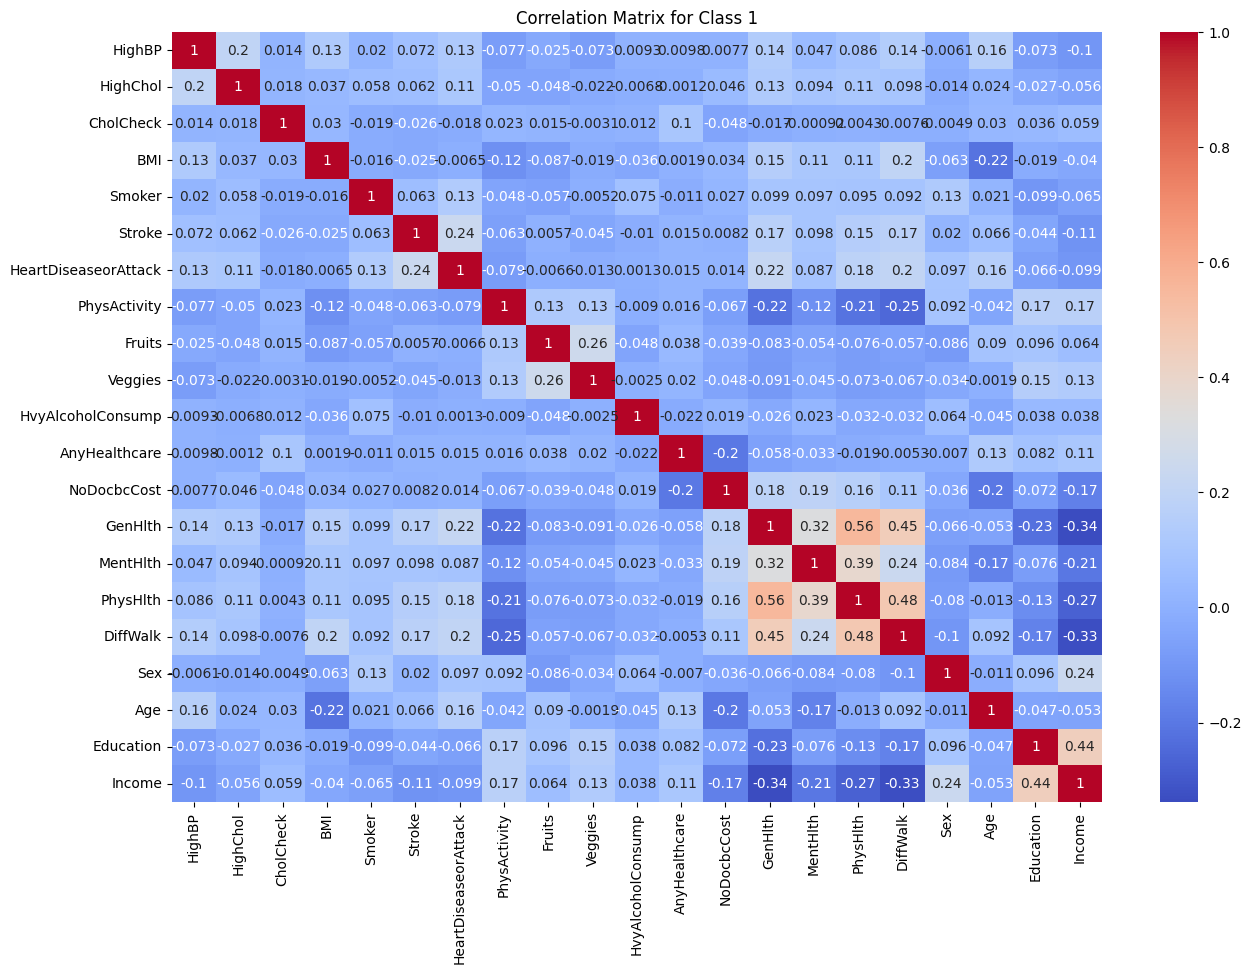

In [10]:
X_0 = X[y == 0]
X_1 = X[y == 1]
corr_matrix_0 = X_0.corr()
corr_matrix_1 = X_1.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_0, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Class 0')
plt.show()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_1, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Class 1')
plt.show()

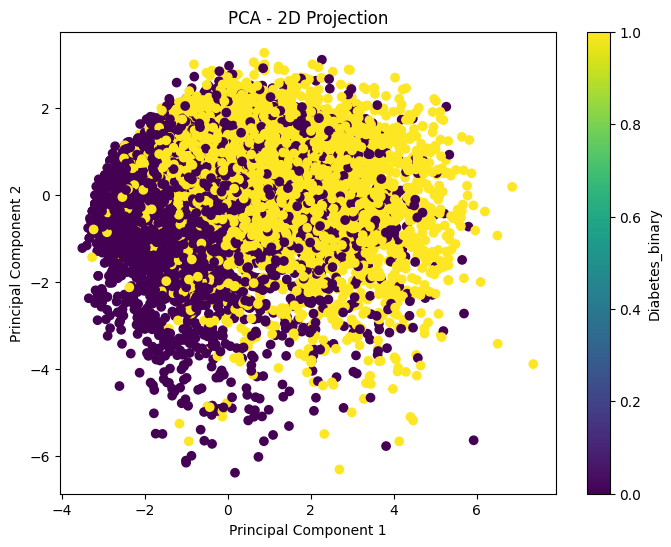

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns=['BMI']))  # Standardize features
X_scaled = pd.DataFrame(X_scaled, columns=X.columns.drop('BMI'))  # Convert back to DataFrame

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled) 

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Color by class labels 'y'
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2D Projection')
plt.colorbar(label='Diabetes_binary')
plt.show()

In [12]:
cv = StratifiedKFold(
    n_splits = 10,
    shuffle = True,
    random_state = 42
) 

gnb = GaussianNB()
cv_scores = cross_val_score(
    gnb,
    X = X,
    y = y,
    cv = cv,
    scoring = 'f1',
)

print("Cross-validation F1 scores:", cv_scores)
print("Mean F1 score:", np.mean(cv_scores))

Cross-validation F1 scores: [0.70707071 0.72100313 0.7244898  0.6996904  0.72746114 0.71517672
 0.73313192 0.71682341 0.69877049 0.69358178]
Mean F1 score: 0.7137199497619591


              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      5020
         1.0       0.72      0.70      0.71      4919

    accuracy                           0.72      9939
   macro avg       0.72      0.72      0.72      9939
weighted avg       0.72      0.72      0.72      9939



Text(0.5, 1.0, 'Confusion Matrix')

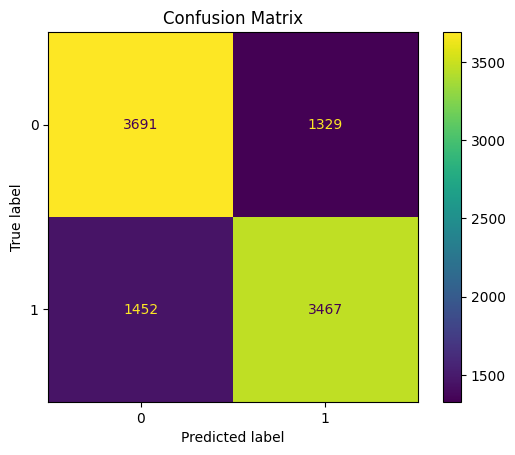

In [13]:
predicted = cross_val_predict(
    estimator = GaussianNB(), 
    X = X,
    y = y,  
    cv = cv
)
print(classification_report(y, predicted))
ConfusionMatrixDisplay(confusion_matrix(y, predicted)).plot()
plt.title('Confusion Matrix')

***
## Selecting best threshold

In this section we will select the best threshold for our model and evaluate the model performance with the selected threshold.

Before we start, we will split the dataset into training and testing sets. We will use the following parameters for the split:

- Train 70% of the data
- Test 30% of the data
- Using random_state=42
- Stratify the data

In [14]:
(X_train, X_test,  y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [15]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6957, 21)
Shape of X_test: (2982, 21)
Shape of y_train: (6957,)
Shape of y_test: (2982,)


In [16]:
# We do a 10-fold cross-validation with 10 iterations
kf = StratifiedKFold(
    n_splits = 10, 
    shuffle = True, 
    random_state = 42
)

In [17]:
# Funtcion to get the best threshold (provided by the professor)
def filterp(threshold,ProbClass1):
    """Given a threshold "threshold" and a set of probabilities of belonging to class 1 "ProbClass1", 
    return predictions.""" 
    y = np.zeros(ProbClass1.shape[0])
    for i,v in enumerate(ProbClass1):
        if ProbClass1[i]>threshold:
            y[i]=1
    return y  

# Encapsulated the calculation of the best threshold in a function to avoid code duplication
def find_best_threshold(model, X_train, y_train):
    """Given a model and a set of training data (X_train, y_train), 
    return the best threshold for the model."""
    # Preparar los subplots (2 filas x 5 columnas para 10 folds)
    lth = []
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()  # Convertir la matriz 2D de axes en un array 1D para acceso fácil

    # Now we compute the threshold by iterating the data we have
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        
        X_train2, X_test2 = X.iloc[train_index], X.iloc[test_index]
        y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]

        # Train with the training data of the iteration 
        model.fit(X_train2, y_train2)
        # Obtaining probability predictions for test data of the iteration
        probs = model.predict_proba(X_test2)
        # Collect probabilities of belonging to class 1
        ProbClass1 = probs[:,1]
        # Sort probabilities and generate pairs (threshold, f1-for-that-threshold) 
        res = np.array([[th,f1_score(y_test2,filterp(th,ProbClass1),pos_label=1)] for th in np.sort(ProbClass1)])
        """
        # Uncomment the following lines if you want to plot at each iteration how f1-score 
        # evolves increasing the threshoclfld 
        plt.plot(res[:,0],res[:,1])
        plt.show()
        """

        ax = axes[i]
        ax.plot(res[:, 0], res[:, 1])
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel("Threshold")
        ax.set_ylabel("F1-score")
        ax.grid(True)

        # Find the threshold that has maximum value of f1-score
        maxF = np.max(res[:,1])
        pl = np.argmax(res[:,1])
        optimal_threshold = res[pl,0]
        
        # Store the optimal threshold found for the current iteration
        lth.append(optimal_threshold)

    # Compute the average threshold for all 10 iterations    D
    threshold = np.mean(lth)
    print(f"Selected threshold in 10-fold cross validation: {np.round(threshold, 6)}")
    return threshold

### Testing the model with default threshold

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      1506
         1.0       0.73      0.71      0.72      1476

    accuracy                           0.72      2982
   macro avg       0.72      0.72      0.72      2982
weighted avg       0.72      0.72      0.72      2982



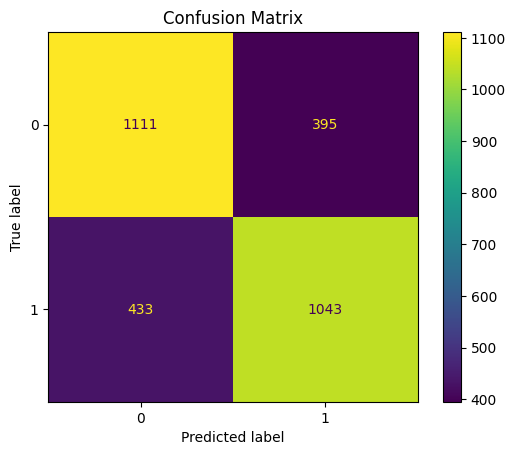

In [18]:
clf = GaussianNB()
clf.fit(X_train, y_train)
probs = clf.predict_proba(X_test)
ProbClass1 = probs[:,1]
predictions = clf.predict(X_test)

print(classification_report(y_test, predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()
plt.title('Confusion Matrix')
plt.show()

### Testing the model with best thresholds

Best threshold for the model:
Selected threshold in 10-fold cross validation: 0.082347
0.08234715264318251


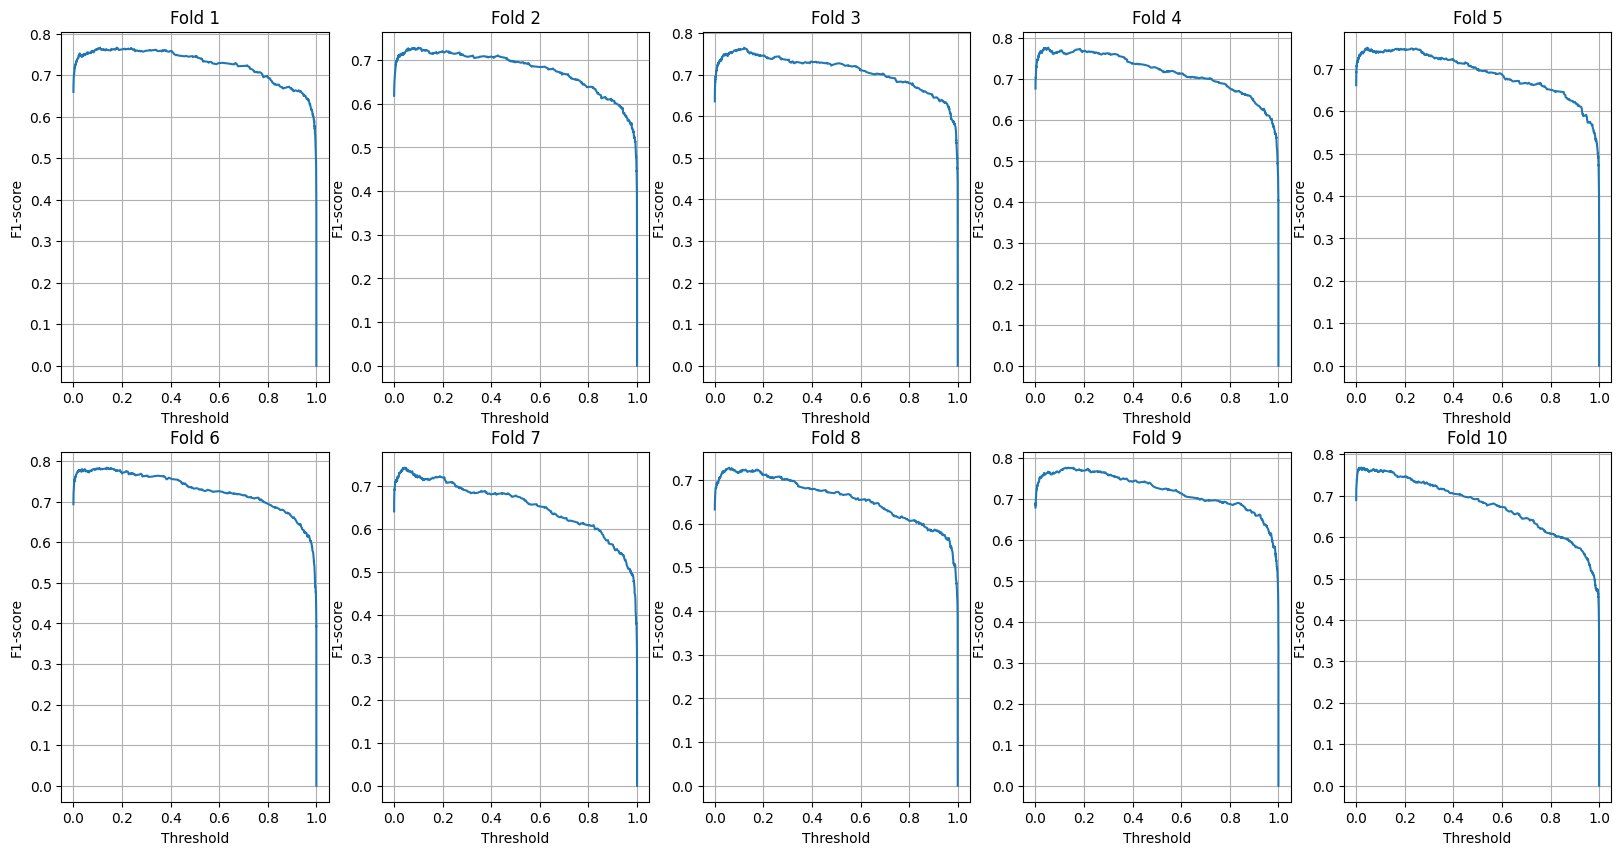

In [19]:
clf = GaussianNB()
print("Best threshold for the model:")
threshold = find_best_threshold(clf, X_train, y_train)
print(threshold)

              precision    recall  f1-score   support

         0.0       0.83      0.56      0.67      1506
         1.0       0.66      0.88      0.76      1476

    accuracy                           0.72      2982
   macro avg       0.74      0.72      0.71      2982
weighted avg       0.75      0.72      0.71      2982



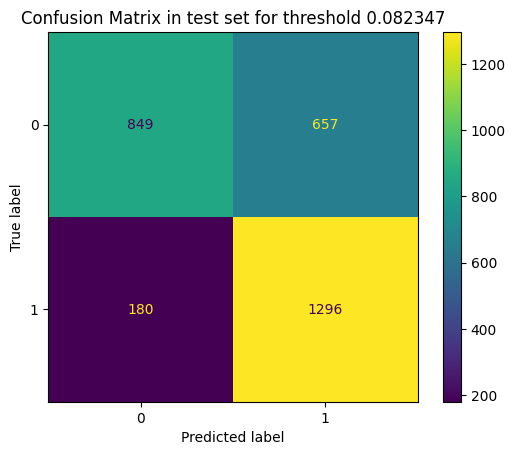

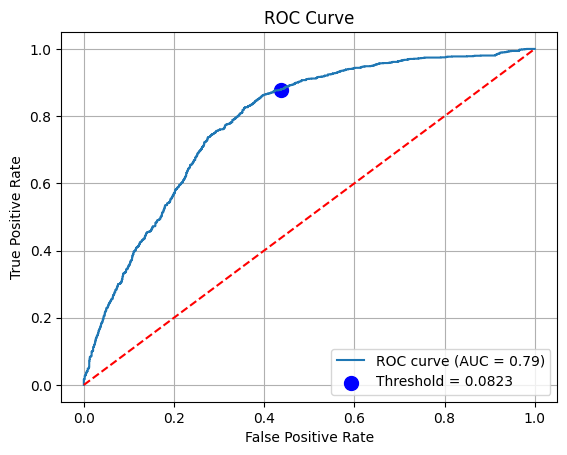

In [20]:
clf.fit(X_train, y_train)

# Obtain probabilities for data on test set
probs = clf.predict_proba(X_test)

# Generate predictions using probabilities and threshold found on 10 folds cross-validation
prediction = filterp(threshold,probs[:,1])

print(classification_report(y_test, prediction))

ConfusionMatrixDisplay(confusion_matrix(y_test, prediction)).plot()
plt.title(f'Confusion Matrix in test set for threshold {np.round(threshold, 6)}')
plt.show()

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get the probabilities for the positive class
y_probs = probs[:, 1]

# Get fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')

# Mark the threshold on the ROC curve
idx = np.argmin(np.abs(thresholds - threshold))
plt.scatter(fpr[idx], tpr[idx], color='blue', s=100, label=f'Threshold = {threshold:.4f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()